# Вводная часть

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Оглавление

1. [Изучение общей информации](#start)
2. [Подготовка данных](#step2)
3. [Исследовательский анализ данных](#step3)
4. [Портрет пользователя каждого региона](#step4)
5. [Проверка гипотез](#step5)
6. [Общий вывод](#step6)

### Шаг 1. Изучение общей информации.<a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5682,Phineas and Ferb: Across the 2nd Dimension,PS3,2011.0,Action,0.15,0.11,0.00,0.05,63.0,6.6,E10+
5648,Murdered: Soul Suspect,PS4,2014.0,Action,0.09,0.16,0.02,0.05,59.0,6.9,M
3296,Tearaway,PSV,2013.0,Adventure,0.14,0.34,0.00,0.14,87.0,8.9,E
2224,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,0.67,0.25,0.00,0.02,71.0,8.8,E
10104,Transformer: Rise of the Dark Spark,PS3,2014.0,Action,0.04,0.04,0.01,0.02,NaN,NaN,NaN
6023,Madden NFL 08,XB,2007.0,Sports,0.22,0.06,0.00,0.01,76.0,6,E
12354,OK! Puzzle Stars,DS,2010.0,Puzzle,0.00,0.06,0.00,0.01,NaN,NaN,NaN
2633,Torneko no Daibouken: Fushigi no Dungeon,SNES,1993.0,Role-Playing,0.00,0.00,0.78,0.00,NaN,NaN,NaN
16528,Pro Evolution Soccer 2010,PC,2009.0,Sports,0.00,0.01,0.00,0.00,78.0,6.9,E
2714,Professor Layton and the Azran Legacy,3DS,2013.0,Puzzle,0.00,0.48,0.25,0.03,81.0,7.9,E10+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('Сумарное количество пропущенных значений по столбцам:')
df.isna().sum()

Сумарное количество пропущенных значений по столбцам:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Проверим название столбцов на корректность (убедимся что нет лишних пробелов, знаков и тд):

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
print('Количество дублирующихся строк:', df.duplicated().sum())

Количество дублирующихся строк: 0


In [8]:
print('Проверка строк на повторение названий игр:')
df['Name'].value_counts()

Проверка строк на повторение названий игр:


Need for Speed: Most Wanted                                       12
Ratatouille                                                        9
Madden NFL 07                                                      9
LEGO Marvel Super Heroes                                           9
FIFA 14                                                            9
                                                                  ..
Mana Khemia 2: Ochita Gakuen to Renkinjutsushi Tachi Portable+     1
Nobunaga no Yabou: Reppuuden                                       1
Sub Rebellion                                                      1
BlazBlue: Calamity Trigger Portable                                1
Dragon Quest Monsters Joker 3                                      1
Name: Name, Length: 11559, dtype: int64

In [9]:
print('Минимальная и максимальная дата релиза игры:', df['Year_of_Release'].min(),'-', df['Year_of_Release'].max())

Минимальная и максимальная дата релиза игры: 1980.0 - 2016.0


In [10]:
print('Представленные игровые платформы и количество игр на них:')
df['Platform'].value_counts()

Представленные игровые платформы и количество игр на них:


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
print('Представленные игровые жанры:')
df['Genre'].value_counts()

Представленные игровые жанры:


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [12]:
print('Уникальные значения в столбце с рейтингом от пользователей:')
df['User_Score'].unique()


Уникальные значения в столбце с рейтингом от пользователей:


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
print('Уникальные значения в столбце с рейтингом от организации ESRB:')
df['Rating'].value_counts()

Уникальные значения в столбце с рейтингом от организации ESRB:


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

#### Описание данных
На ввод мы получили данные об играх, игровых платформах, их продаже и оценке. Датафрейм состоит из 16714 строк и 11 столбцов (названия столбцов начинаются с заглавной буквы) в которых содержится информация:

**1. Name** — название игры

- название игр может повторяться (возможно в зависимости от платформы)
- есть 2 пропущенных значения

**2. Platform** — платформа

- игровые платформы представлены еще и в разрезе поколений (например PS, PS2, PS3 и тд)

**3. Year_of_Release** — год выпуска

- представлены игры с 1980 по 2016 год
- формат необходимо заменить на целочисленный
- 269 пропущенных значений (возможно нет информации о годе выпуска)

**4. Genre** — жанр игры

- есть 2 пропущенных значения
- представлено 12 игровых жанров

**5. NA_sales** — продажи в Северной Америке (миллионы проданных копий)

- перевести миллионы в тысячи
- изменить формат на целочисленный

**6. EU_sales** — продажи в Европе (миллионы проданных копий)

- перевести миллионы в тысячи
- изменить формат на целочисленный

**7. JP_sales** — продажи в Японии (миллионы проданных копий)

- перевести миллионы в тысячи
- изменить формат на целочисленный

**8. Other_sales** — продажи в других странах (миллионы проданных копий)

- перевести миллионы в тысячи
- изменить формат на целочисленный

**9. Critic_Score** — оценка критиков (максимум 100)

- 8578 пропущенных значений (возможно критики не оценивали конкретно эти игры, или произошла ошибка выгрузки)
- изменить формат на целочисленный

**10. User_Score** — оценка пользователей (максимум 10)

- 6701 пропущенное значение 
- присутствуют значения "tbd" (необходимо разобраться что это)
- присутствуют нулевые значения
- тип данных необходимо заменить на числовой

**11. Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

- 6766 пропущенных значений (возможно данная организация не присваивала рейтинг конкретной игре)
- присутствуют категории рейтинга от организации ESRB, декодинг обозначений следующий:

«E» («Everyone») — «Для всех»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«EC» («Early childhood») — «Для детей младшего возраста»

«RP» («Rating Pending») — «Рейтинг ожидается»

«K-A» (Kids to Adults) - «Для всех» (старое название для рейтинга E, по сути его дублирует)

«AO» («Adults Only 18+») — «Только для взрослых»

### Вывод

Для анализа данных представлены данные об играх, их доходах и оценках до 2016 года. В данных обнаружились следующие недочеты:

- Название игр может повторяться (Need for Speed: Most Wanted повторяется 12 раз), необходимо рассмотреть подробней почему так происходит, и принять решение что с этим делать

- Присутствуют артефакты (например, значение "tbd" в столбце с оценкой от пользователей)

- Во многих столбцах пропущенные значения, необходимо оценить и разобраться что с ними сделать

- Категории от организации ESRB представлены заглавной буквой от англ. слов (возможно для презентативности данных стоит расшифровать категории, если будет необходимость)

- Необходимо поменять формат столбцов там, где это требуется (например, год релиза игры на целочисленный)

- Посчитать суммарные продажи во всех регионах

Все эти действия необходимо оценить и обработать, чтобы на выходе получить датафрейм готовый для анализа данных.

### Шаг 2. Подготовка данных<a id="step2"></a>

Для начала приведем названия заголовков столбцов к нижнему регистру:

In [14]:
df.columns = df.columns.str.lower()

#### 2.1 Предобработка столбца 'name'

Мы видели, что у нас в строчках может повторяться название одной и той же игры, посмотри являются ли они дубликатами на примере игры которая чаще всего повторяется:

In [15]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Это не дубликаты потому что разбивка идет по платформе. Так же присутствуют несколько релизов по одной платформе (PC) в 2005 и 2012 годах соответственно. Можем предположить, что игра несколько раз выпускалась по причине ремастеринга или выпуска новых дополнений.

Мы помним что у нас было 2 пропущенных значения, посмотрим на них:

In [16]:
df[df['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы не можем идентифицировать игру, учитывая, что у нее пропущено много значений помимо названия (жанр (заодно "убьем" все пропуски в этом столбце), оценки, рейтинг), то принимаем решение удалить эти строки.

In [17]:
df = df.dropna(subset=['name'])

#### 2.2 Предобработка столбца 'Year_of_Release'

Так как сейчас в данных год представлен в формате float64, без месяца и дня, изменим тип данных на целочисленный. Но перед этим заменим пропущенные значения на "0", так как значения NaN имеют формат float, и их нельзя заменить на int.

In [18]:
df['year_of_release'] = df['year_of_release'].fillna('0')
df['year_of_release'] = df['year_of_release'].astype(int)

In [19]:
print('Выборочно посмотрим строки с пропущенным годом релиза:')
df.query('year_of_release == 0').head()

Выборочно посмотрим строки с пропущенным годом релиза:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Пропуски в этом столбце совершенно случайные, в теории, если принципиально важна точность, можно было бы заменить пропущенные значения по дате релиза вручную (по названию игры "гуглить" дату релиза), но в нашем слуае дедлайны не позволяют этого сделать :). Пропущенные значения не будем удалять, потому что в данный момент они не мешают расчетам. 

#### 2.2 Предобработка столбцов с числом проданных копий ('na_sales', 'eu_sales', 'jp_sales', 'other_sales')

Удобней будет смотреть на целое число проданных копий игр в разных регионах. Переведем число копий из млн в тысячи и поменяем формат на целочисленный:

In [20]:
df['na_sales'] = df['na_sales'] * 1000000
df['na_sales'] = df['na_sales'].astype(int)

df['eu_sales'] = df['eu_sales'] * 1000000
df['eu_sales'] = df['eu_sales'].astype(int)

df['jp_sales'] = df['jp_sales'] * 1000000
df['jp_sales'] = df['jp_sales'].astype(int)

df['other_sales'] = df['other_sales'] * 1000000
df['other_sales'] = df['other_sales'].astype(int)

#### 2.3 Предобработка столбцов с оценками ('critic_score', 'user_score')

В столбце 'user_score' присутствуют артефакты "tbd", это аббревиатура от "to be determined" - пока не определён. Видимо оценки для этой игры еще не опубликовали (или никогда не опубликуют). По сути это такое же пропущенное значение, как и NaN, поэтому заменим все "tbd" на NaN, чтобы была возможность изменить тип данных на float.

In [21]:
df= df.replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore') # переведем текст в числа
df['user_score'] = df['user_score'].astype(float)

In [22]:
print('Проверим формат:')
df.dtypes

Проверим формат:


name                object
platform            object
year_of_release      int64
genre               object
na_sales             int64
eu_sales             int64
jp_sales             int64
other_sales          int64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [23]:
print('Количество пропусков в столбце с оценкой критиков:', df['critic_score'].isna().sum())
print('Доля пропусков в столбце с оценокй критиков', 8576 / 16713 * 100)
print('---------------------------------------------------------------')
print('Количество пропусков в столбце с оценкой пользователей:', df['user_score'].isna().sum())
print('Доля пропусков в столбце с оценокой пользователей', 9123 / 16713 * 100)

Количество пропусков в столбце с оценкой критиков: 8576
Доля пропусков в столбце с оценокй критиков 51.313348890085564
---------------------------------------------------------------
Количество пропусков в столбце с оценкой пользователей: 9123
Доля пропусков в столбце с оценокой пользователей 54.58625022437623


Так же в столбцах: 'critic_score', 'user_score' присутствует большое количество пропущенных значений, доля пропусков составляет 51% и 55% соответственно. Удалить такое количество значений означает потерять много данных, поэтому прибегать мы к этому способу не будем. Заменять данные пропуски мы тоже не можем, потому что данные критерии не зависят от других параметров. Например, оценка критиков не зависит от оценки пользователей, они могут быть похожи или даже наоборот оценка может диаметрально отличаться. Или количество проданных копий игры не показатель оценки, например, есть нишевые жанры игр, с небольшим количеством проданных копий, но с высокой оценкой, или наоборот большое количество проданных копий, но низкой оценкой (сильно ожидаемый релиз, с большим количеством предпродаж, но не оправдавший ожидания критиков и пользователей). Здесь нельзя как-то категоризировать данные и заполнить пропуски средним или медианным значением, потому что нет определенных тенденций и взаимосвязей. Принимаем решение оставить пропуски без изменений.

#### 2.4 Добавляем столбец с сумарными продажами количества копий

Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец:

In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [25]:
print('Итоговый взгляд после предобработки:')
print()
df.info()

Итоговый взгляд после предобработки:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null int64
eu_sales           16713 non-null int64
jp_sales           16713 non-null int64
other_sales        16713 non-null int64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16713 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.7+ MB


#### Вывод

В процессе предобработки данных мы проделали следующую работу:

- привели заголовки столбцов к нижнему регистру (можно было и в столбцах (например с названием игры) привести значения к нижнему регистру, но и такие данные не искажают результат)

- удалили 2 строки с неизвестным названием игры и жанром (данные пропуски появились в результате ошибки выгрузки, или отсутствии данных)

- заменили тип на целочисленные в столбцах с датой и количеством проданных копий, а также перевели оценку пользователей в числовой тип данных (изначально был текстовый)

- нашли большое количество случайных пропусков, которые объективно нельзя заменить

- добавили столбец с сумарнной продажей количества копий по каждой игре

В результате проделанной предобработки можно приступать к качественному анализу данных.  

### Шаг 3. Исследовательский анализ данных<a id="step3"></a>

Построим гистограмму и посмотрим на количество релизов в год:

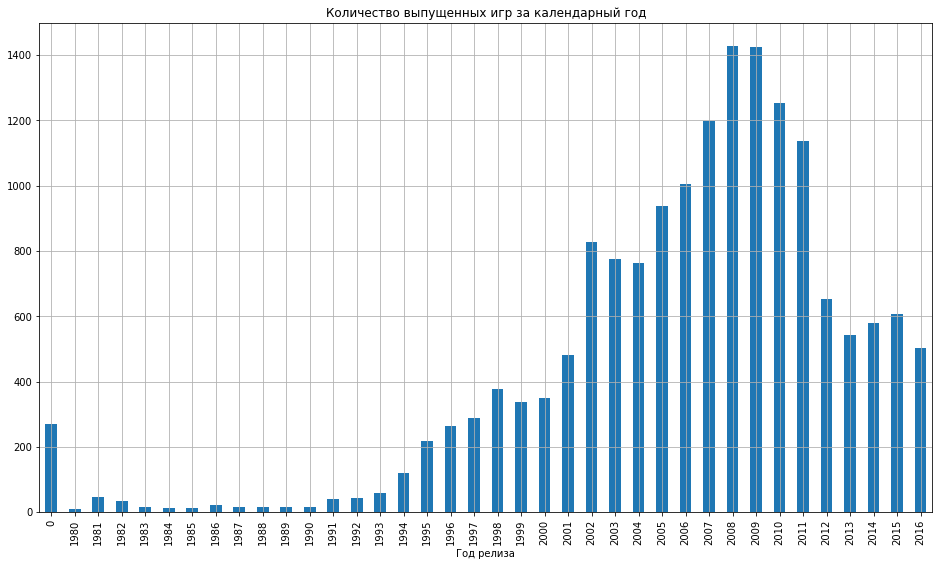

In [26]:
year_of_release_count = ( df.groupby('year_of_release')['name'].count()
                         .plot(kind='bar', grid=True, figsize=(16,9), title='Количество выпущенных игр за календарный год')
                         .set_xlabel('Год релиза')
)

Судя по графику, мы можем наблюдать, что рост количества релизов начинает заметно проявляться с 1994 года и вплоть до 2010 практически всегда видна положительная динамика прироста. Более 500 игр в год выходило в период с 2002 по 2016. Нулевые значения - это игры с неизвестной датой релиза.

Посмотрим, как менялись продажи по платформам. Сделаем срез по году релиза, возьмем только релизы начиная с 1994 года, так как с этого года началась положительная динамика роста сегмента релиза игр. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [27]:
df_release_growth = df.query('year_of_release > 1993')
df_release_growth.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

platform
PS2     1233559992
X360     961239999
PS3      931339995
Wii      891179997
DS       802760000
PS       727579994
PS4      314139997
GBA      312879999
PSP      289530000
3DS      257809997
Name: total_sales, dtype: int64

Будем считать, что платформы с наибольшими суммарными продажами - это платформы на которых более 500 млн продаж. 

In [28]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Text(0.5, 0, 'Год релиза')

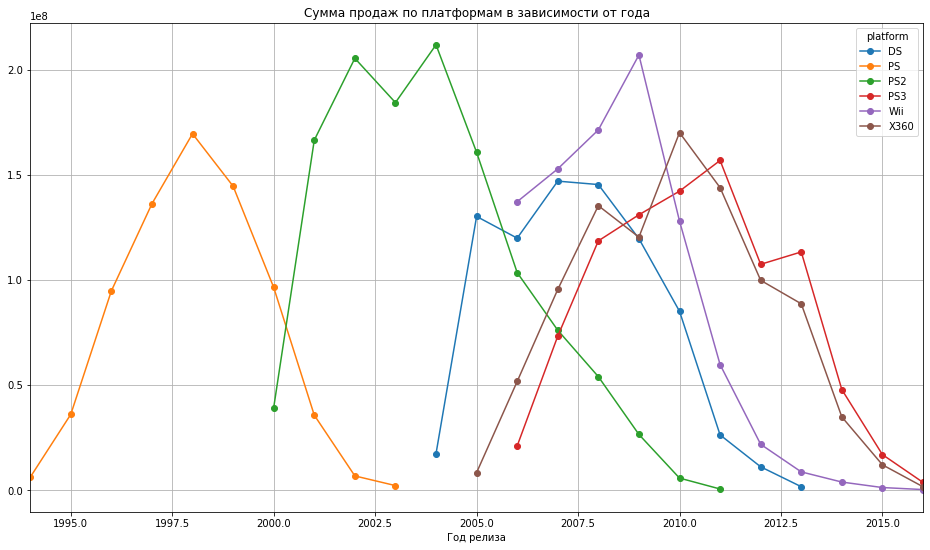

In [29]:
df_release_growth.query('platform == @top_platform')\
                 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
                 .plot(xlim=(1994, 2016), style='o-', figsize=(16, 9), grid=True, title='Сумма продаж по платформам в зависимости от года')\
                 .set_xlabel('Год релиза')

На графике видно, как распределяется доход в зависимости от года по каждой платформе, почти все распределения похожи на "нормальное распределение" со своим пиком, начальным и конечным периодом. Так же видны и платформы конкуренты, которые развиваются параллельно. Построим столбчатые графики для каждой платформы, для более подробного рассмотрения:

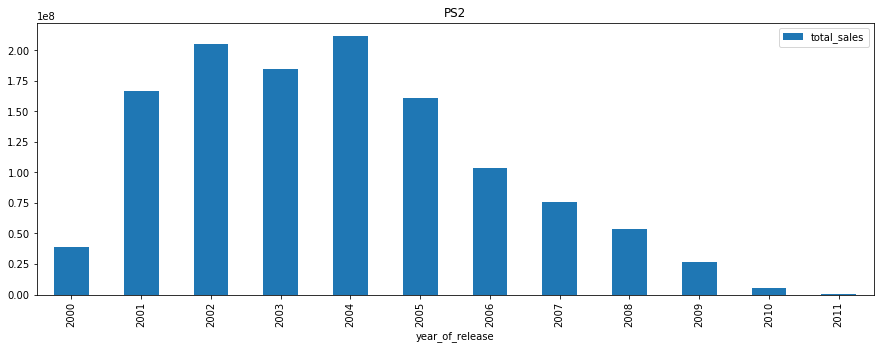

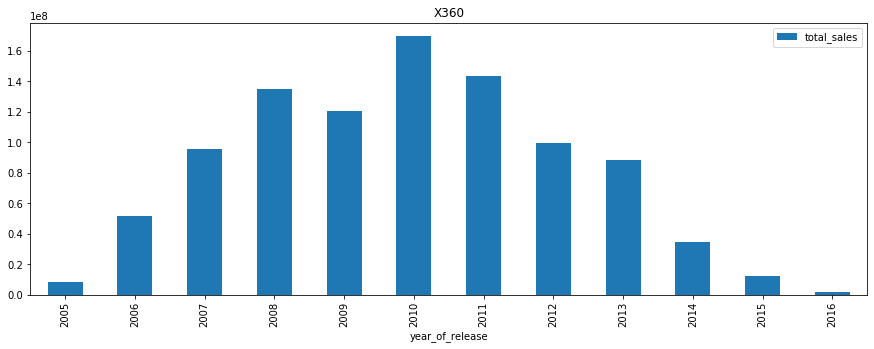

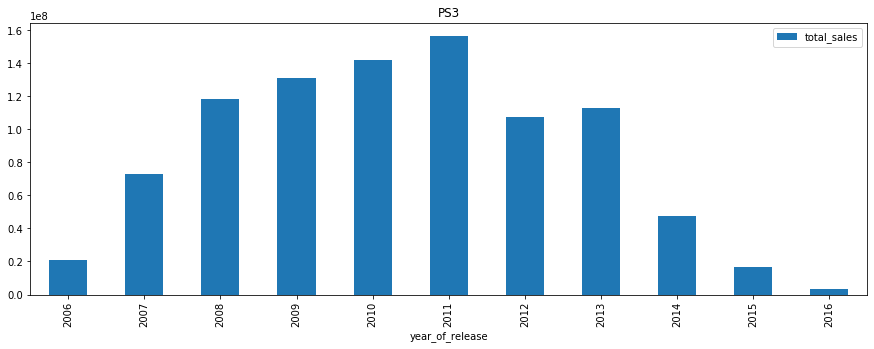

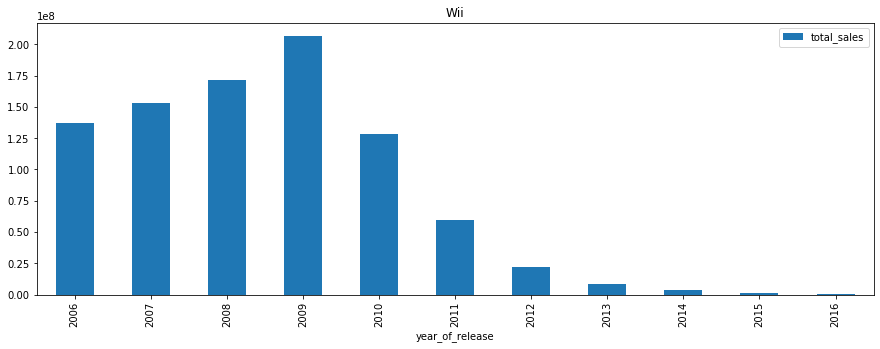

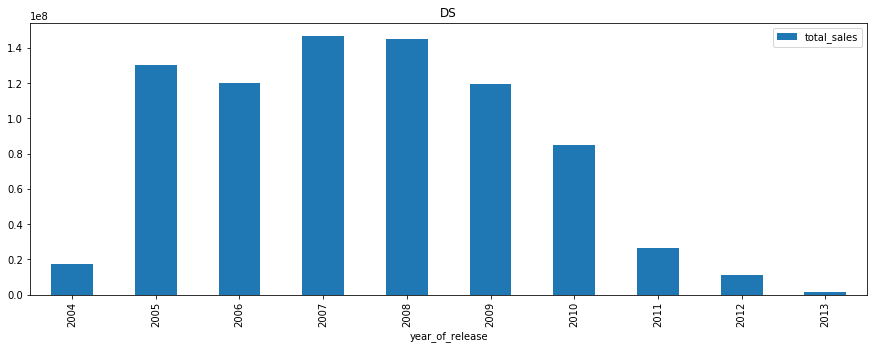

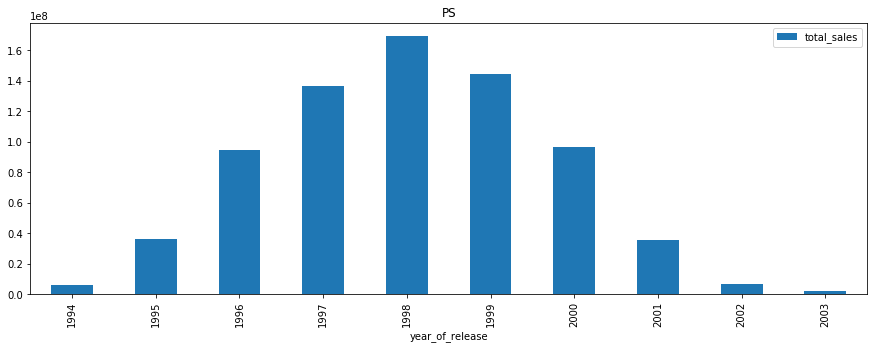

In [30]:
for platform in top_platform:
    df_release_growth[df_release_growth['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5), title=platform)

In [31]:
years_of_release = df.query('year_of_release != 0 and platform == @top_platform').groupby('platform')['year_of_release']\
                                                   .agg(['min', 'max'])\
                                                   .reset_index()
years_of_release['years_of_life'] = years_of_release['max'] - years_of_release['min']
years_of_release.loc[0, 'platform'] = 2004
years_of_release

,platform,min,max,years_of_life
0,2004,1985,2013,28
1,PS,1994,2003,9
2,PS2,2000,2011,11
3,PS3,2006,2016,10
4,Wii,2006,2016,10
5,X360,2005,2016,11


Замечаем явный выброс у платформы DS. Почитав про эту платформу немного информации в интернете понимаем что это Nintendo DS (дата выхода 2004 - дата прекращения поддержки 2014). Перед нами возникает вопрос, как игры на эту платформу выходили задолго до ее выхода, посмотрим сколько таких игр:

In [32]:
df.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3081,LEGO Harry Potter: Years 5-7,DS,0,Action,340000,250000,0,70000,69.0,NaN,E10+,660000
3289,Advance Wars: Days of Ruin,DS,0,Strategy,430000,120000,0,50000,86.0,8.7,E10+,600000
5443,Bejeweled 3,DS,0,Puzzle,290000,20000,0,20000,75.0,NaN,E,330000
5932,Shrek the Third,DS,0,Action,260000,10000,0,20000,70.0,6.5,E,290000
9664,Charm Girls Club: My Fashion Mall,DS,0,Simulation,120000,0,0,10000,NaN,NaN,E,130000
9855,The Daring Game for Girls,DS,0,Adventure,110000,0,0,10000,NaN,NaN,E,120000
10486,Atsumare! Power Pro Kun no DS Koushien,DS,0,Sports,0,0,100000,0,NaN,NaN,NaN,100000
10612,My Healthy Cooking Coach,DS,0,Simulation,90000,0,0,10000,NaN,NaN,E,100000
10686,Happy Feet Two,DS,0,Action,80000,10000,0,10000,NaN,NaN,E,100000
10764,Luminous Arc 2 (JP sales),DS,0,Role-Playing,0,0,100000,0,NaN,NaN,NaN,100000


Это явная ошибка в данных, отфильтруем ее, и посчитаем среднее значение жизни топовых платформ:

In [33]:
years_of_release.loc[0, 'min'] = 2004
years_of_release['years_of_life'] = years_of_release['max'] - years_of_release['min']
print('Средняя продолжительность жизни платформ:' ,years_of_release['years_of_life'].mean())
years_of_release

Средняя продолжительность жизни платформ: 10.0


,platform,min,max,years_of_life
0,2004,2004,2013,9
1,PS,1994,2003,9
2,PS2,2000,2011,11
3,PS3,2006,2016,10
4,Wii,2006,2016,10
5,X360,2005,2016,11


Мы видим, что средняя жизнь платформы составляет примерно 10 лет. И как правило первые и последние годы жизни платформы - это либо ее рост, либо падение, стремящееся к нулевым продажам. Учитывая, что данные по 2016 год, будем считать, что актуальный период - это последние 7 лет (вычтем из средней жизни платформы крайние значения, но при этом помним что 2016 год содержит неполные данные и по сути анализируем не 7, а 6 лет).

In [34]:
df_actyal = df.query('year_of_release > 2009')

Посмотрим какие платформы лидируют по продажам:

Лидеры по суммарным продажам:
platform
PS3     587739997
X360    550410000
PS4     314139997
3DS     257809997
Wii     222969999
XOne    159319999
DS      123750000
PC      121960000
WiiU     82190000
PSP      64050000
PSV      53810000
PS2       6090000
Name: total_sales, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


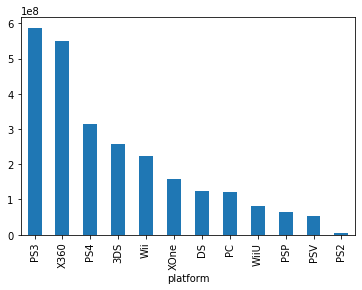

In [35]:
print('Лидеры по суммарным продажам:')
print(df_actyal.groupby('platform')['total_sales'].sum().sort_values(ascending = False))
print(df_actyal.groupby('platform')['total_sales'].sum().sort_values(ascending = False).plot(kind='bar'))

Теперь посмотрим на динамику дохода в зависимости от года:

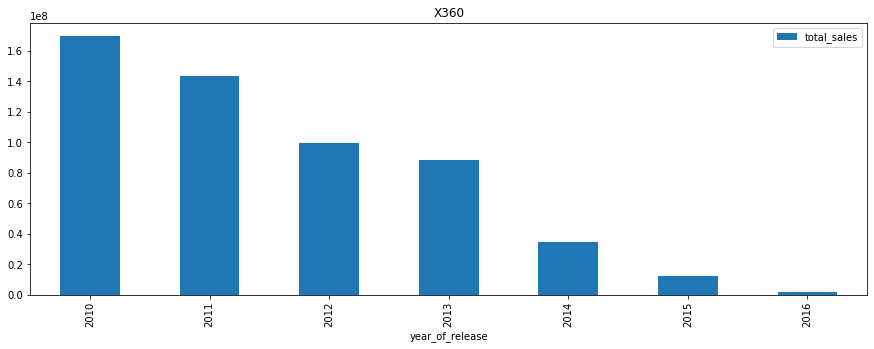

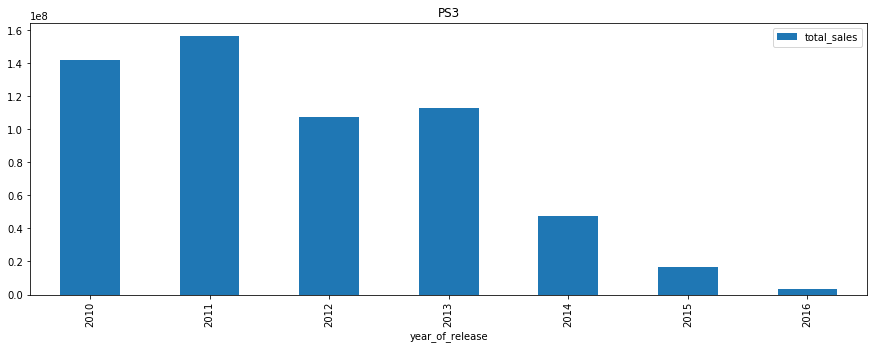

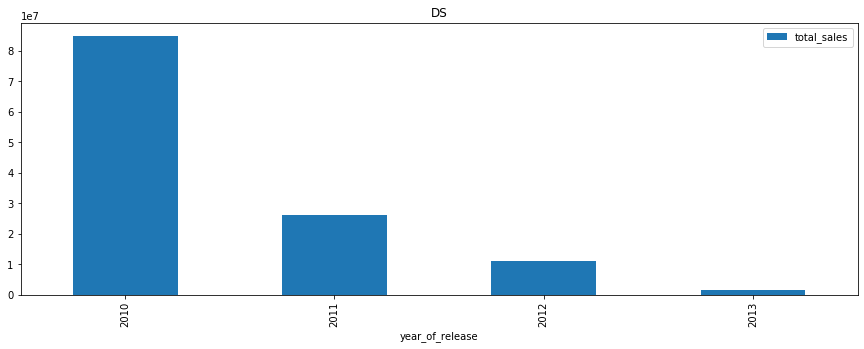

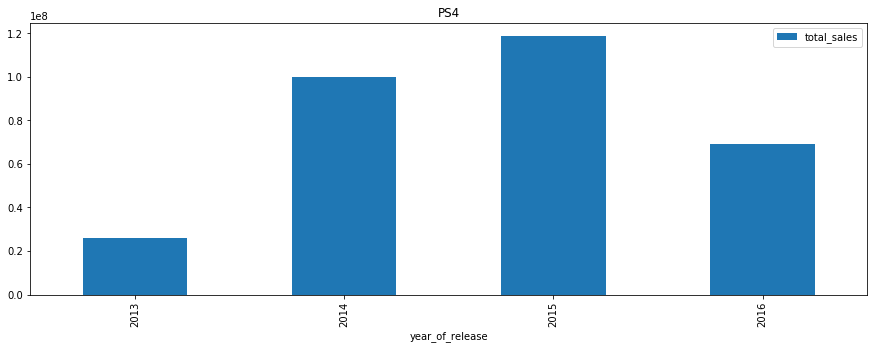

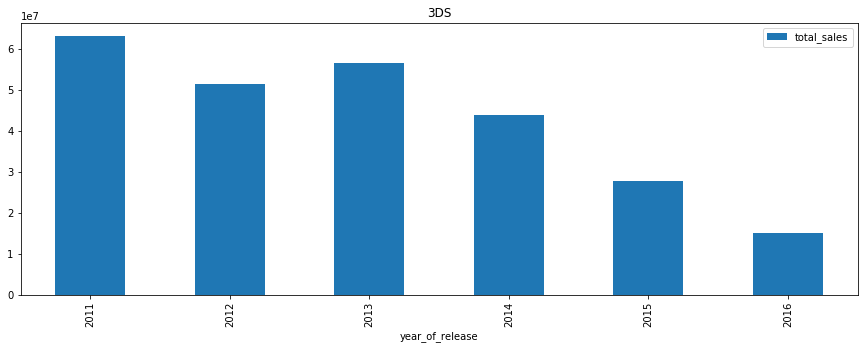

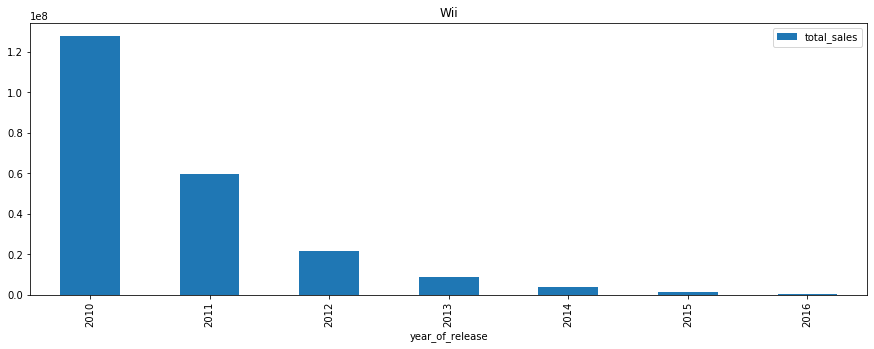

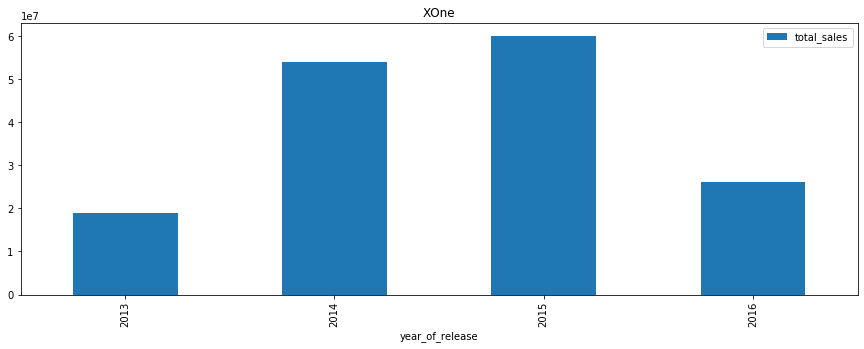

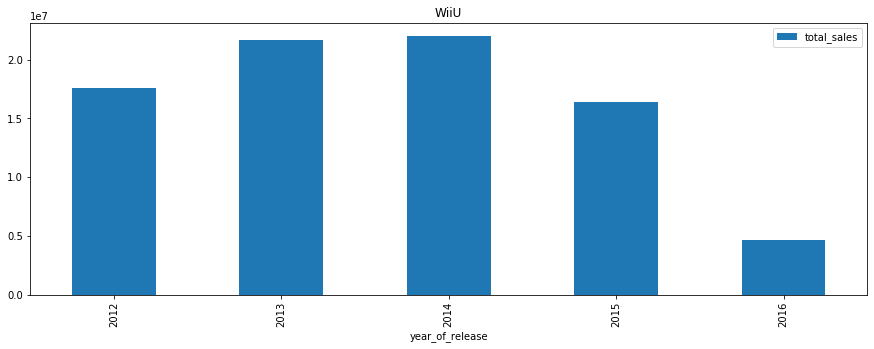

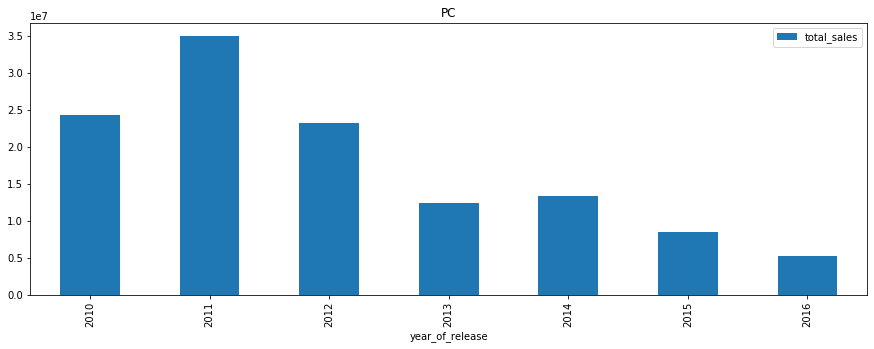

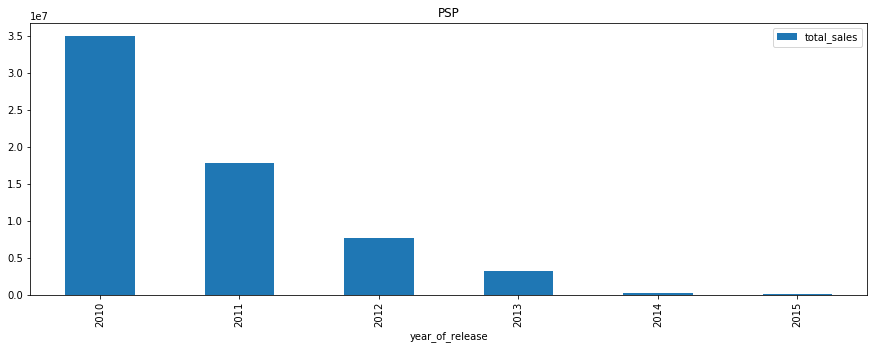

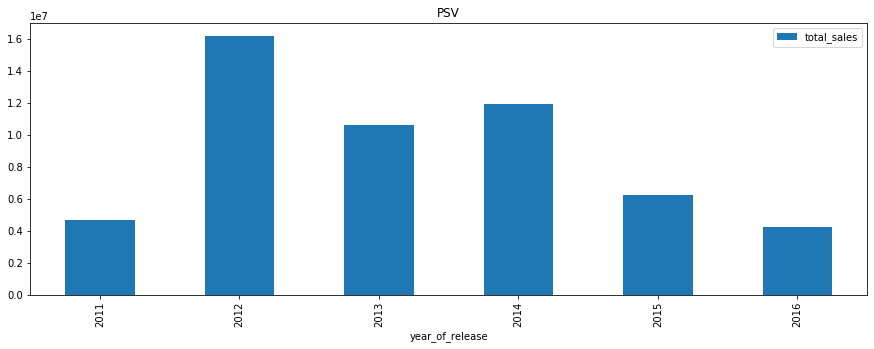

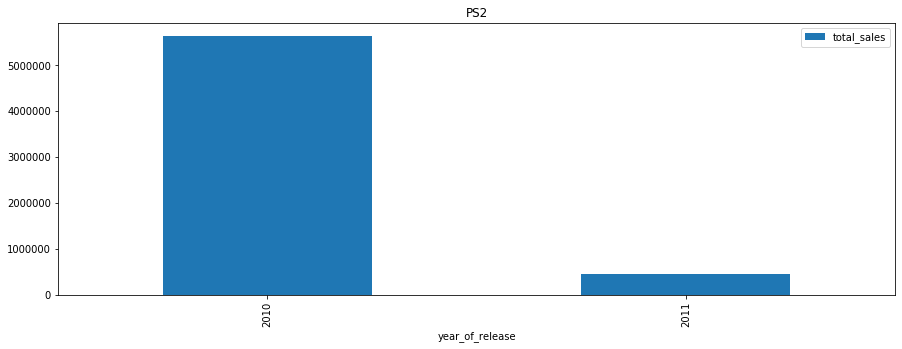

In [36]:
uniq_platf = df_actyal['platform'].unique()
for platform in uniq_platf:
    df_actyal[df_actyal['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5), title=platform)

В результате мы нашли платформы, лидирующие по продажам: X360, PS3, Wii, DS. Например, у Wii пик доходов был в 2009 г., а дальше доходы пошли на спад, а в 2015 г. доходы уже приближаются к нулю. Это хороший пример уже "умирающей" платформы. Поскольку нам интересны потенциально развивающиеся платформы с хорошими будущими продажами то выделим: PS4, XOne, WiiU, PC (на графике PC видно, что доходы падают, но в целом держаться на неплохом уровне, да и здравый смысл подсказывается что PC всегда перспективная платформа для игр, и возможно с выходом новой видеокарты, начнут выпускаться новые игры, а значит начнет расти доход). Стоит отметить что спады в 2016г. на графиках из-за того, что данные за этот год в выгрузку не полные.

Построим боксплоты по потенциально развивающимся платформам, и посмотрим распределение:

In [37]:
growing_platform = ['PS4', 'XOne', 'WiiU', 'PC']

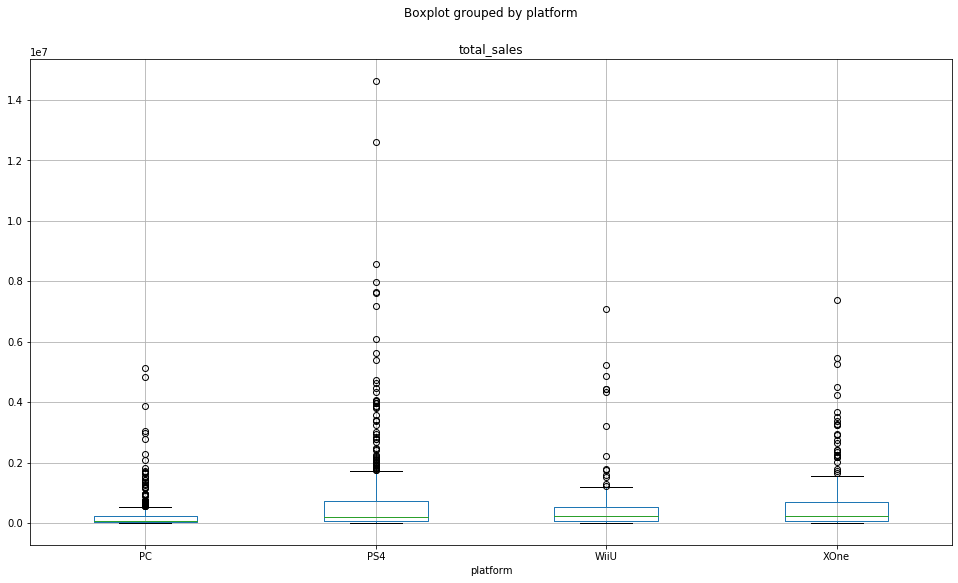

In [38]:
df_actyal[df_actyal['platform'].isin(growing_platform)].boxplot('total_sales', by='platform', figsize=(16, 9))
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [39]:
df_actyal_growing_platform = df_actyal.query('platform == @growing_platform')

In [40]:
df_actyal_growing_platform.groupby('platform')['total_sales']\
    .agg(['sum', 'count', 'mean', 'median', 'min', 'max'])\
    .reset_index()

,platform,sum,count,mean,median,min,max
0,PC,121960000,479,254613.778706,80000,10000,5140000
1,PS4,314139997,392,801377.543367,200000,10000,14630000
2,WiiU,82190000,147,559115.646259,220000,10000,7090000
3,XOne,159319999,247,645020.238866,220000,10000,7390000


На распределении мы видим, что:
- **платформа PC:** имеет наибольшее количество игр, больше чем на других платформах вместе взятых, но в среднем, проданных копий существенно меньше. Это говорит нам о том, что количество не значит качество, и продажи вялотекущие. Условный доход за каждый релиз в 2-4 раза, в среднем, меньше в сравнении с другими платформами.

- **платформа WiiU:** имеет наименьшее количество игр, но при этом медианное и среднее количество проданных релизов на уровне остальных платформ (кроме PC)

- **платформа XOne:** имеет хороший средний доход, при этом много выбросов на графике (значит много игр которые продали большое количество копий)

- **платформа PS4:** имеет наибольший средний доход, при этом много выбросов на графике (в том числе есть и аномально большие, которые сильно искажают среднее значение, об этом говорит и медианное значение которое меньше чем у XOne)

Учитывая, что мы интернет-магазине «Стримчик», наиболее интересные для нас платформы для продажи игр это: XOne и PS4, потому что это активно развивающиеся на конец 2016 г. платформы, еще не дошедшие до своего пика, при этом уже имеют конкурентное количество проданных копий на фоне других платформ и обгоняют стабильную по продажам платформу PC.

**Разница между платформами:**
Так же при учете информации необходимо понимать что платформы отличаются по своим функционалам, так платформа PC - это персональный компьютер, который хоть и является игровой платформой, но игры не являются приоритетом этой платформы. PS 4 и XOne самые распространенные консоли, созданные в первую очередь для игр, об этом говорит и количество проданных копий на них. Так же они основные конкуренты на рынке платформ. WiiU не типичная игровая консоль, не пытающайся конкурировать с PS 4 и XOne, имеющая своеобразный геймплей (управление движением). Игры на нее разрабатывает, в большей массе, сам производитель. Поэтому тут важны такие параметры как популярность платформы, и ее целевая аудитория. 

Посмотрите, как влияют на продажи внутри одной популярной платформы (за такую платформу возьмем PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [41]:
df_actyal

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15000000,4890000,240000,1690000,61.0,6.3,E,21820000
16,Grand Theft Auto V,PS3,2013,Action,7020000,9090000,980000,3960000,97.0,8.2,M,21050000
23,Grand Theft Auto V,X360,2013,Action,9660000,5140000,60000,1410000,97.0,8.1,M,16270000
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5510000,3170000,5650000,800000,NaN,NaN,NaN,15130000
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9040000,4240000,130000,1320000,88.0,3.4,M,14730000
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0,0,10000,0,NaN,NaN,NaN,10000
16707,Aiyoku no Eustia,PSV,2014,Misc,0,0,10000,0,NaN,NaN,NaN,10000
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10000,0,NaN,NaN,NaN,10000
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10000,0,NaN,NaN,NaN,10000


Корреляция оценки критиков с количеством проданных копий составляет: 0.4065679058173355
Корреляция оценки пользователей с количеством проданных копий составляет: -0.031957108857618044


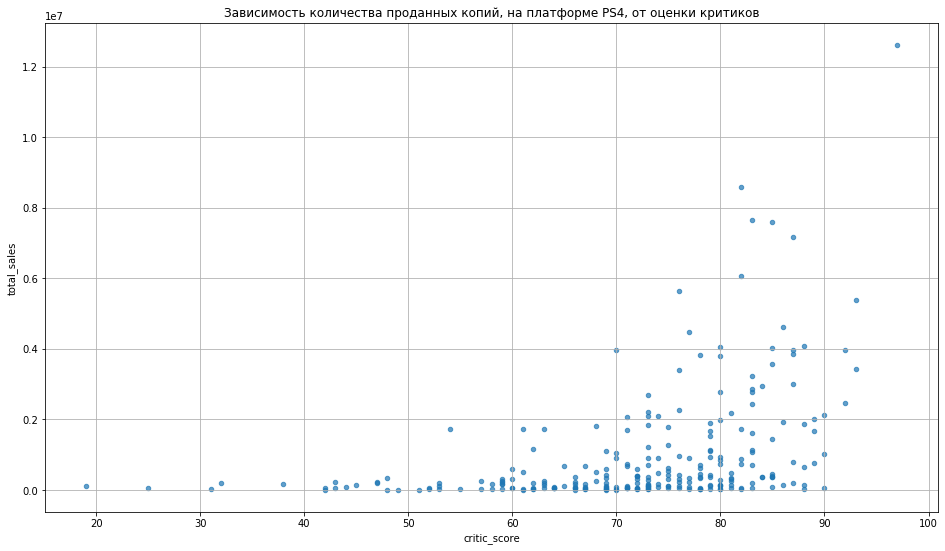

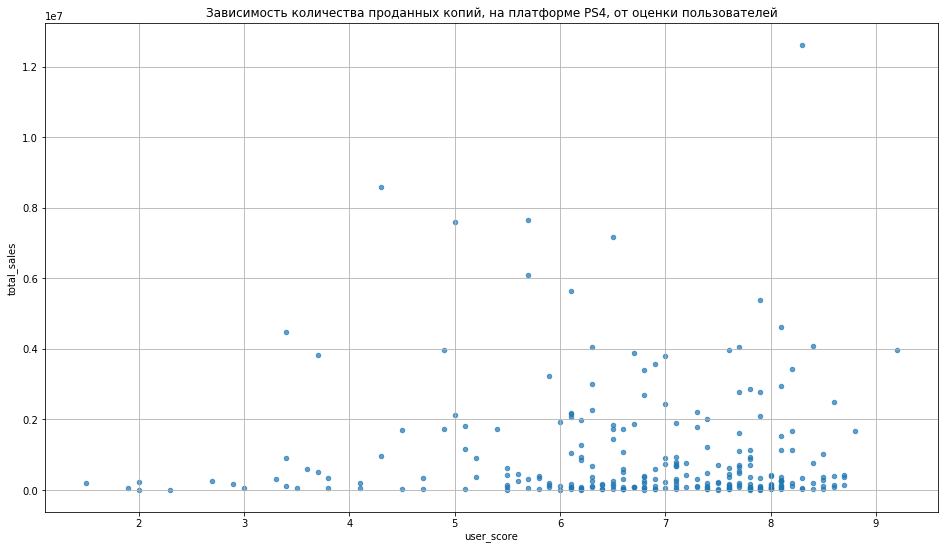

In [42]:
PS4 = df_actyal.query('platform == "PS4"')
PS4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.7, title='Зависимость количества проданных копий, на платформе PS4, от оценки критиков', figsize=(16, 9))
print('Корреляция оценки критиков с количеством проданных копий составляет:', PS4['critic_score'].corr(PS4['total_sales']))

PS4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.7, title='Зависимость количества проданных копий, на платформе PS4, от оценки пользователей', figsize=(16, 9))
print('Корреляция оценки пользователей с количеством проданных копий составляет:', PS4['user_score'].corr(PS4['total_sales']))

Оценка критиков влияет на продажу игр с положительной динамикой: чем выше оценка - тем чаще игра продается большее количество раз. А вот оценка пользователей, наоборот показывает практически нулевую зависимость. Это может быть связано с разными факторами, например, обида комьюнити игроков на конкретного разработчика игры (например не выпустили игру в срок), вследствие чего идет атака на игры которые уже выпущены, намеренно снижая им оценку, или плохие комментарии от фанатов конкурентов.

Корреляция оценки критиков с количеством проданных копий составляет: 0.3057098475519466
Корреляция оценки пользователей с количеством проданных копий составляет: 0.06483930251977801


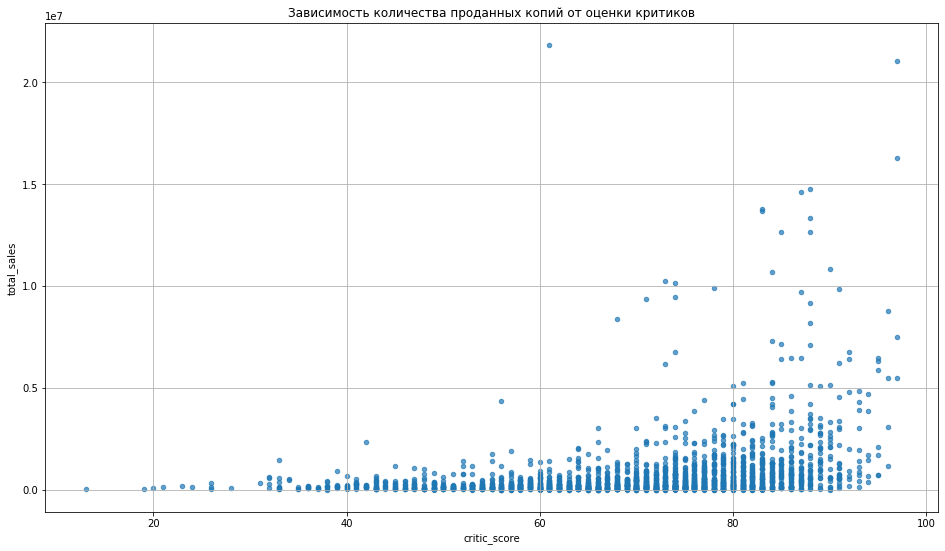

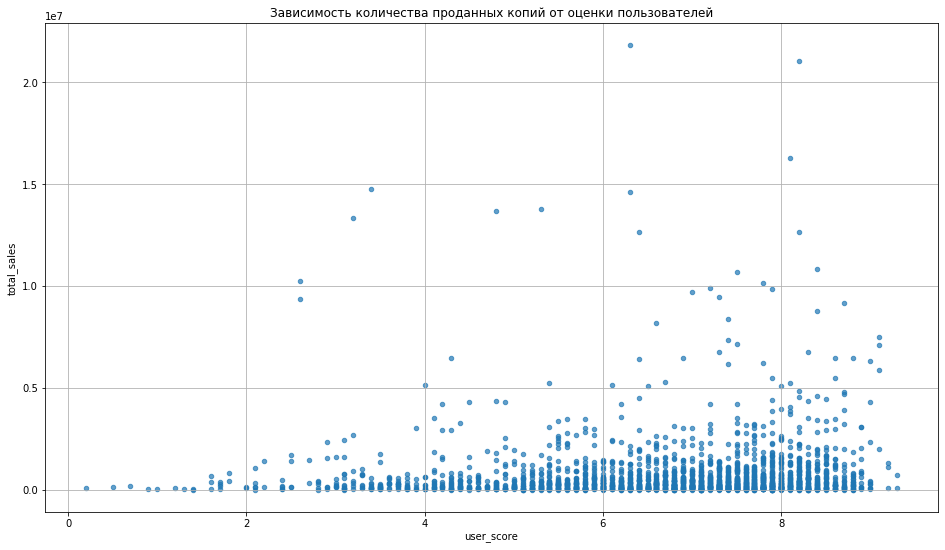

In [43]:
other_platform = df_actyal.query('platform != "PS4"')
other_platform.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.7, title='Зависимость количества проданных копий от оценки критиков', figsize=(16, 9))
print('Корреляция оценки критиков с количеством проданных копий составляет:', other_platform['critic_score'].corr(other_platform['total_sales']))

other_platform.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.7, title='Зависимость количества проданных копий от оценки пользователей', figsize=(16, 9))
print('Корреляция оценки пользователей с количеством проданных копий составляет:', other_platform['user_score'].corr(other_platform['total_sales']))

По остальным платформам мы видим примерно такое же распределение как и по платформе PS4. Оценка критиков имеет небольшую положительную корреляцию, при этом оценки пользователей имеют практически нулевую корреляцию. Возможно на количество продаж сильно влияют элементы маркетинга и рекламы.

Посмотрим на общее распределение игр по жанрам:

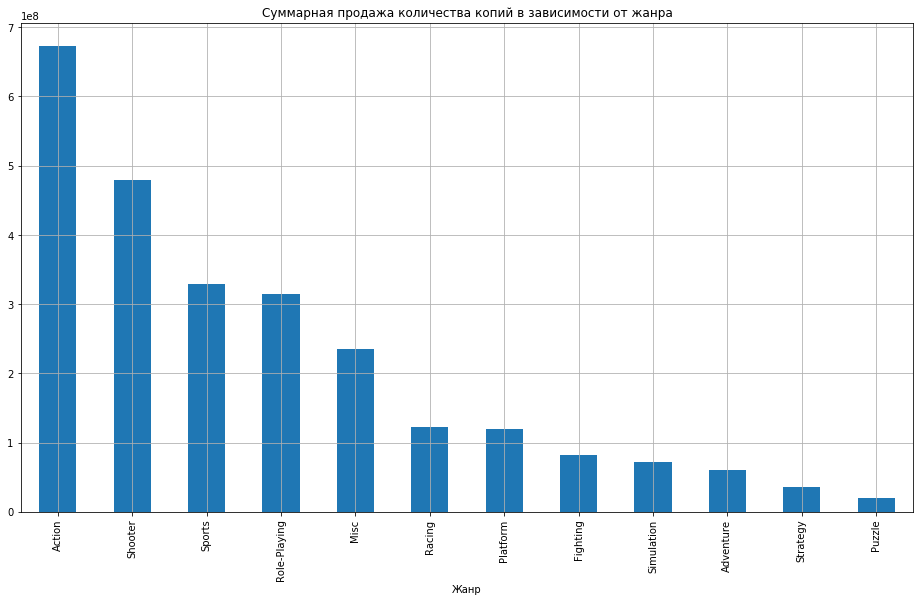

Text(0.5, 0, 'Жанр')

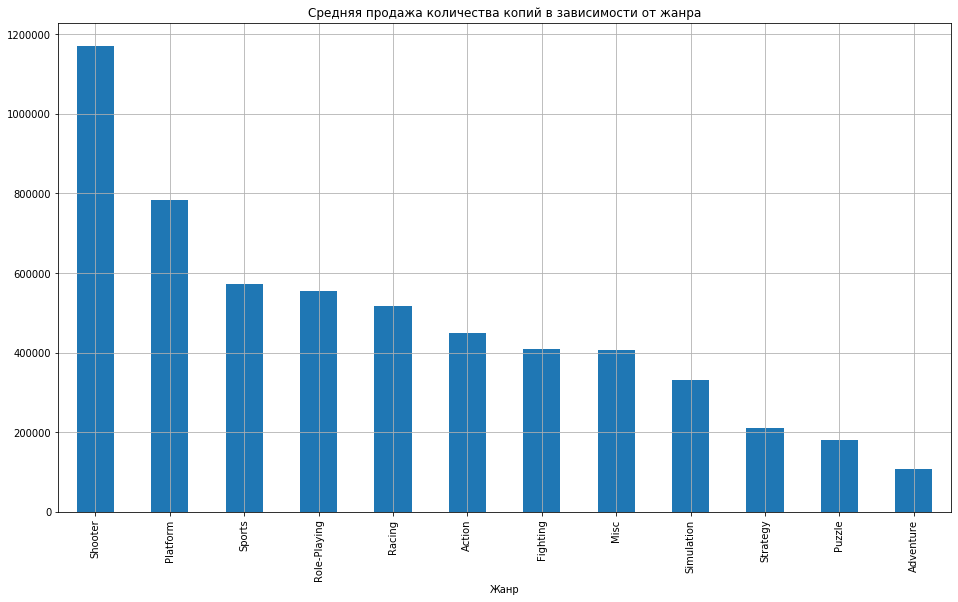

In [44]:
df_actyal.groupby('genre')['total_sales'].sum()\
         .sort_values(ascending=False)\
         .plot(kind='bar', grid=True, figsize=(16,9), title='Суммарная продажа количества копий в зависимости от жанра')\
         .set_xlabel('Жанр')
plt.show()
df_actyal.groupby('genre')['total_sales'].mean()\
         .sort_values(ascending=False)\
         .plot(kind='bar', grid=True, figsize=(16,9), title='Средняя продажа количества копий в зависимости от жанра')\
         .set_xlabel('Жанр')

In [45]:
df_actyal.groupby('genre')['total_sales'].agg(['count', 'sum', 'mean']).reset_index()

,genre,count,sum,mean
0,Action,1495,673089995,4.502274e+05
1,Adventure,563,61000000,1.083481e+05
2,Fighting,199,81590000,4.100000e+05
3,Misc,576,234559999,4.072222e+05
4,Platform,153,119720000,7.824837e+05
5,Puzzle,114,20600000,1.807018e+05
6,Racing,237,122679999,5.176371e+05
7,Role-Playing,568,315280000,5.550704e+05
8,Shooter,410,479739998,1.170098e+06
9,Simulation,217,71749999,3.306452e+05


Посмотрим на два распределения в зависимости от жанра:

1. Суммарное количество проданных копий

2. Среднее количество проданных копий

Суммарное количество проданных копий не совсем объективно показывает действительные реалии, например жанр Action по суммарным продажам уверенный лидер. И это благодаря большому количеству релизов игр данного жанра, которые в среднем неплохо продавались. Но при этом в среднем жанр Action ровно посередине распределения. Нам, как магазину, интереснее какие жанры игр в среднем продаются чаще, и тут топ 3 жанра это: Shooter, Platform (наглядный пример того, что из-за небольшого количества игр суммарный доход небольшой, но в среднем статистика продаж выглядит намного лучше), Sports (естественно, ведь спортивные симуляторы как под копирку штампуются ежегодно, только цифра года в названии меняется). Зато тройка аутсайдеров в двух распределениях одинаковая, это: Puzzle, Strategy, Adventure (не спасает даже большое количество игр в жанре Adventure от низких суммарных и средних продаж).

#### Вывод

Нам как магазину по продаже игр интересно найти ответы на несколько вопросов:
1. понять какие платформы сейчас активно развиваются, а какие уже не востребованы

В результате проделанной работы можно выделить 2 платформы которые будут набирать обороты по продажам в 2017 г. это: XOne и PS4. Учитывая, что средняя жизнь платформы 11 лет, эти две, в ближайшие годы, будут выходить на пик по динамике проданных копий.


2. определиться с ассортиментом игр на которые будем делать приоритет в продаже

Мы выяснили что количество выпущенных игр в жанре еще не говорит о его доходности. В среднем явные лидеры продаж жанры: Shooter, Platform, Sports на них можно делать приоритет по закупке игр для платформ: XOne и PS4.

### Шаг 4. Портрет пользователя каждого региона<a id="step4"></a>

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). 
2. Самые популярные жанры (топ-5). 
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### 1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [46]:
print('Топ платформ 5 региона na:')
df_na = df_actyal.groupby('platform')[['na_sales', 'total_sales']].sum().sort_values(by='na_sales', ascending=False).head().reset_index()
df_na['ratio'] = df_na['na_sales'] / df['na_sales'].sum() * 100
display(df_na)
print('Топ платформ 5 региона eu:')
df_eu = df_actyal.groupby('platform')[['eu_sales', 'total_sales']].sum().sort_values(by='eu_sales', ascending=False).head().reset_index()
df_eu['ratio'] = df_eu['eu_sales'] / df['eu_sales'].sum() * 100
display(df_eu)
print('Топ платформ 5 региона jp:')
df_jp = df_actyal.groupby('platform')[['jp_sales', 'total_sales']].sum().sort_values(by='jp_sales', ascending=False).head().reset_index()
df_jp['ratio'] = df_jp['jp_sales'] / df['jp_sales'].sum() * 100
display(df_jp)

Топ платформ 5 региона na:


,platform,na_sales,total_sales,ratio
0,X360,334180000,550410000,7.594016
1,PS3,229249998,587739997,5.209552
2,Wii,121199999,222969999,2.754189
3,PS4,108739999,314139997,2.471044
4,XOne,93120000,159319999,2.116090


Топ платформ 5 региона eu:


,platform,eu_sales,total_sales,ratio
0,PS3,213599999,587739997,8.811372
1,X360,163410000,550410000,6.740947
2,PS4,141089998,314139997,5.820208
3,PC,68820000,121960000,2.838945
4,Wii,65910000,222969999,2.718902


Топ платформ 5 региона jp:


,platform,jp_sales,total_sales,ratio
0,3DS,100620000,257809997,7.755870
1,PS3,59260000,587739997,4.567808
2,PSP,42200000,64050000,3.252810
3,DS,27900000,123750000,2.150554
4,PSV,21840000,53810000,1.683445


В каждом регионе популярные платформы отличаются, судя по долям продаж есть производители игровых платформ, которые преобладают на этом рынке, например, в регионе na 13% от всех продаж у X360, это больше чем в сумме у платформ PS3 и PS2. В регионе eu наоборот преобладает платформа PS3, но и основной ее конкурент - платформа X360 отстает на ранке этого региона на 2.5%. В регионе jp рынок платформ заметно отличается, наибольшая доля у DS, но и разрывы в распределении доли между платформами тут меньше всего, значит в этом регионе преобладают разновидности платформ, и нет явных лидеров как в регионах: na и eu.

#### 2.Самые популярные жанры (топ-5). 

Будем определять популярность жанра в зависимости от среднего значения продаж количества копий в конкретном регионе:

In [47]:
print('Топ 5 жанров региона na:')
display(df_actyal.groupby('genre')['na_sales'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False).head().reset_index())
print('Топ 5 жанров региона eu:')
display(df_actyal.groupby('genre')['eu_sales'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False).head().reset_index())
print('Топ 5 жанров региона jp:')
display(df_actyal.groupby('genre')['jp_sales'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False).head().reset_index())

Топ 5 жанров региона na:


,genre,count,sum,mean
0,Shooter,410,237469999,579195.119512
1,Platform,153,54900000,358823.529412
2,Sports,575,156810000,272713.043478
3,Misc,576,123799999,214930.553819
4,Role-Playing,568,112050000,197271.126761


Топ 5 жанров региона eu:


,genre,count,sum,mean
0,Shooter,410,171449999,418170.729268
1,Platform,153,38300000,250326.797386
2,Racing,237,54749999,231012.654008
3,Sports,575,116839999,203199.998261
4,Action,1495,233629998,156274.246154


Топ 5 жанров региона jp:


,genre,count,sum,mean
0,Role-Playing,568,103540000,182288.732394
1,Platform,153,15810000,103333.333333
2,Fighting,199,13900000,69849.246231
3,Simulation,217,13300000,61290.322581
4,Action,1495,72200000,48294.314381


Мы видим, что в зависимости от регионов, предпочтения пользователей по жанрам могут различаться или наоборот совпадать. В регионе eu и na два первых жанра одинаковые, при этом жанры, расположившиеся на 3 и 4 позиции тоже идентичны, просто меняются местами, отличие только в жанрах, расположившихся на 5 месте. Но в целом можно выдвинуть гипотезу, что популярные жанры в этих регионах одинаковые. Зато лидер в регионе jp жанр, которого нет даже в топ 5 других регионов. И в целом видно, как вкусовые предпочтения игроков отличаются, в этом регионе в зависимости от жанра, от других регионов. 

Японский рынок имеет такие принципиальные отличия возможно потому, что долгое время это была закрытая страна, со своими культурными особенностями. Но при этом, развитие технологий (в том числе и игровых), в этой стране, как минимум, не уступало передовым западным странам. Поэтому платформы и игры производителями из японии разрабатывались в первую очередь для граждан этой страны, с учетом их жанровых интересов. Передовые западные игры не всегда вызывают интерес на этом рынке, вследствие культурных особенностей людей. А местные производители "заточены" на производстве игр в первую очередь опираясь на интересы внутреннего рынка. Банально, но для Японцев "свое" интересней и лучше "чужого".

#### 3.Влияет ли рейтинг ESRB на продажи в отдельном регионе

Посмотрим как влияют продажи в разных регионах в зависимости от рейтинга ESRB:

«E» («Everyone») — «Для всех»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«EC» («Early childhood») — «Для детей младшего возраста»

«RP» («Rating Pending») — «Рейтинг ожидается»

«AO» («Adults Only 18+») — «Только для взрослых»

In [48]:
df_actyal['rating'] = df_actyal['rating'].fillna('RP') # заменим пропуски на «RP» («Rating Pending») — «Рейтинг ожидается»
rating_ESRB_pivot = df_actyal.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
rating_ESRB_pivot['ratio_eu_sales'] = rating_ESRB_pivot['eu_sales'] / df_actyal['eu_sales'].sum() * 100 
rating_ESRB_pivot['ratio_jp_sales'] = rating_ESRB_pivot['jp_sales'] / df_actyal['jp_sales'].sum() * 100
rating_ESRB_pivot['ratio_na_sales'] = rating_ESRB_pivot['na_sales'] / df_actyal['na_sales'].sum() * 100
rating_ESRB_pivot

,rating,eu_sales,jp_sales,na_sales,ratio_eu_sales,ratio_jp_sales,ratio_na_sales
0,E,197339998,47870000,271149999,23.459065,15.687881,23.986872
1,E10+,99280000,13220000,159379999,11.802047,4.332438,14.099309
2,EC,0,0,1130000,0.000000,0.000000,0.099964
3,M,292039998,30450000,382219999,34.716658,9.979026,33.812511
4,RP,139470000,171490000,155719998,16.579689,56.200433,13.775533
5,T,113079999,42110000,160809999,13.442541,13.800223,14.225812


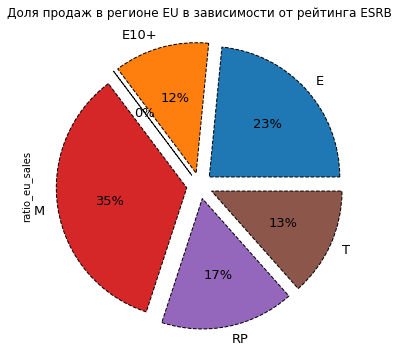

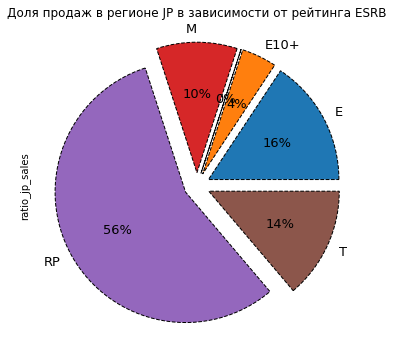

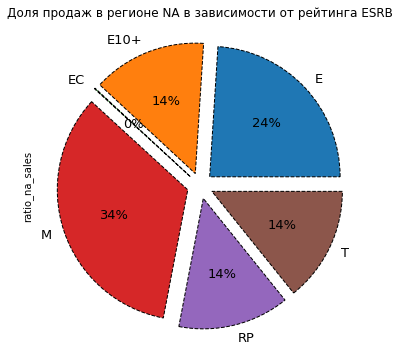

In [49]:
rating_ESRB_pivot.plot(kind='pie', y='ratio_eu_sales', 
                       figsize=(11, 6), index, fontsize=13, 
                       title="Доля продаж в регионе EU в зависимости от рейтинга ESRB", 
                       legend=False, autopct='%1.0f%%', 
                       explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), 
                       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})

rating_ESRB_pivot.plot(kind='pie', y='ratio_jp_sales', figsize=(11, 6), labels=rating_ESRB_pivot['rating'], fontsize=13, title="Доля продаж в регионе JP в зависимости от рейтинга ESRB", legend=False, autopct='%1.0f%%', explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})

rating_ESRB_pivot.plot(kind='pie', y='ratio_na_sales', figsize=(11, 6), labels=rating_ESRB_pivot['rating'], fontsize=13, title="Доля продаж в регионе NA в зависимости от рейтинга ESRB", legend=False, autopct='%1.0f%%', explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})

Предпочтения в регионе Америки(na) и Европы(eu) в целом похожи, поэтому будем их рассматривать вместе:

- Предпочтения в регионах NA и EU в зависимости от рейтинга ESRB:

Мы видим, что преобладает рейтинг «E» («Everyone») — «Для всех» (33% для NA, 31% для EU), доля продаж игр с этим рейтингом самая высокая. Второе место по доле продаж занимает рейтинг «M» («Mature») — «Для взрослых» (24% для NA, 27% для EU), доля этого рейтинга ниже возможно потому что есть возрастные ограничения, и не все желающие могут приобрести игру с этим рейтингом, на третьем месте игры с рейтингом: «T» («Teen») — «Подросткам» (18% для NA, 16% для EU).

- Предпочтения в регионе JP в зависимости от рейтинга ESRB:

Сразу видно, что ESRB американская организация, потому что наибольшая доля игр без рейтинга именно в регионе jp (Японя). Возможно Японцы в большей массе играют в игры местных разработчиков, которые вполне вероятно не выходят на американские и европейские рынки и соответственно не обозреваются организацией ESRB. Из того что мы можем сказать по этому региону на основе нашей выборки, то что большая доля игр в рейтинге «E» («Everyone») — «Для всех» (21%), на втором месте «T» («Teen») — «Подросткам» (15%).

Так же в выборке практически не представлены игры с рейтингом «EC» («Early childhood») — «Для детей младшего возраста». Видимо игры с этим рейтингом не пользуются спросам, или в нашей выборке они не попали.

### Вывод:

С целью определить портрет пользователя каждого региона в данном шаге мы рассмотрели следующие вопросы:

1. Самые популярные платформы (топ-5). 
2. Самые популярные жанры (топ-5). 
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Нам как магазину необходимо понимать спрос на какие платформы и жанры больше, в зависимости от региона. Мы увидели, что в целом, отвечая на эти вопросы, предпочтения в регионах na и eu у пользователей похожи и по жанрам, и по платформам. Однако в регионе jp картина полностью меняется, и мы видим, что предпочтения пользователей уже иные. Нам как магазину важно понимать на какой регион мы работаем, чтобы отталкиваться от ассортимента наших продаж. А если мы работаем на разные регионы, то и предложение магазина должно быть сформировано на основании спроса и предпочтений по платформам и жанрам каждого региона отдельно. Например, в регионе Америка в лидерах по платформам X360, а в лидерах по жанрам Shooter, но если мы на основании этой информации захотим выйти на рынок Японии, где потребительские предпочтения сильно отличаются, то наш бизнес обречен на смерть.

### Шаг 5. Проверка гипотез<a id="step5"></a>

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвинем гипотезу, что средний рейтинг пользователей платформ Xbox One и PC различается. Несмотря на то, что аудитория у этих платформ скорее-всего разная, и ассортимент игр разный, будем считать, что:

- H₀ (нулевая гипотеза) - средняя оценка игр платформ Xbox One и PC не различается
- H₁ - средняя оценка игр платформ Xbox One и PC отличается

Уровень значимости примем за 5%.

In [50]:
pc = df_actyal.query('platform == "PC" and user_score != "nan"')
Xbox = df_actyal.query('platform == "XOne" and user_score != "nan"')

In [51]:
print('Среднее значение платформы PS:', pc['user_score'].mean())
print('Среднее значение платформы Xbox One:', Xbox['user_score'].mean())
print('Уже видим что средняя оценка отличается более чем на 0.5, уже можно предполагать об отвержении нулевой гипотезы')

Среднее значение платформы PS: 6.5181818181818185
Среднее значение платформы Xbox One: 6.521428571428572
Уже видим что средняя оценка отличается более чем на 0.5, уже можно предполагать об отвержении нулевой гипотезы


In [52]:
print('Дисперсия выборки платформы PC:', np.var(pc['user_score'], ddof=1))
print('Дисперсия выборки платформы Xbox One:',np.var(Xbox['user_score'], ddof=1))

Дисперсия выборки платформы PC: 2.450446015110894
Дисперсия выборки платформы Xbox One: 1.9069968429360695


In [53]:
alpha = 0.05

results = st.ttest_ind(pc['user_score'],
                      Xbox['user_score'],
                      equal_var = False) # не будем считать дисперсии равными

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


**Вывод**: наблюдаемые на выборках по платформам значения не попадают в зону уровня значимости, это означает что вероятность такого события при верной нулевой гипотезе более 5% и отвергнуть ее мы не можем. Но это не значит, что альтернативная гипотеза не верна, возможно если увеличить или изменить выборку мы сможем отклонить нулевую гипотезу.

#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Выдвинем гипотезу, что средний рейтинг пользователей на игровые жанры Action и Sports различается. Несмотря на то, что целевая аудитория у этих жанров скорее-всего разная, будем считать, что:

- H₀ (нулевая гипотеза) - средняя оценка игр жанров Action и Sports не различается
- H₁ - средняя оценка игр жанров Action и Sports отличается

Уровень значимости примем за 5%.

In [54]:
Action = df_actyal.query('genre == "Action" and user_score != "nan"')
Sports = df_actyal.query('genre == "Sports" and user_score != "nan"')

In [55]:
print('Среднее значение жанра Action:', Action['user_score'].mean())
print('Среднее значение жанра Sports:', Sports['user_score'].mean())
print('Уже видим что средняя оценка отличается менее чем на 0.1, уже можно предполагать что нулевую гипотезу не получится отвергнуть')

Среднее значение жанра Action: 6.781899871630296
Среднее значение жанра Sports: 5.901587301587302
Уже видим что средняя оценка отличается менее чем на 0.1, уже можно предполагать что нулевую гипотезу не получится отвергнуть


In [56]:
print('Дисперсия выборки жанра Action:', np.var(Action['user_score'], ddof=1))
print('Дисперсия выборки платформы Sports:',np.var(Sports['user_score'], ddof=1))

Дисперсия выборки жанра Action: 1.8501475426606517
Дисперсия выборки платформы Sports: 2.8356344151248614


In [57]:
alpha = 0.05

results = st.ttest_ind(Action['user_score'],
                      Sports['user_score'],
                      equal_var = False) # не будем считать дисперсии равными

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4516152467844418e-15
Отвергаем нулевую гипотезу


**Вывод**: наблюдаемые на выборках по жанрам значения попадают в зону уровня значимости, это означает, что вероятность такого события при верной нулевой гипотезе признаётся слишком малым (меньше 5%). Следовательно, у нас есть основание отвергнуть нулевую гипотезу. А это означает что мы получили статистически значимый результат, и приняли альтернативную гипотезу, в которой говорится, что средняя оценка игр жанров Action и Sports отличается.

### Шаг 6. Общий вывод<a id="step6"></a>

Мы работники интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. На ввод мы получили данные о продажах игр, оценке пользователей и экспертов, а также информацию о жанрах и платформах. Нам предстояло выявить определяющие успешность игры закономерности, для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. При первичном знакомстве с данными мы столкнулись с необходимостью:

- обработать пропущенные значения
- изменить типы данных, там, где это требовалось
- посчитать суммарное количество проданных копий

Если бы такая выгрузка данных поступила на основании продаж нашего магазина, то можно было бы сообщить коллегам о проблемах в данных (например, отсутствующее значения в названии игр). В результате предобработки приступили к анализу данных:

- посмотрели сколько ежегодно выходит релизов в зависимости от года:

На основании наших данных, мы увидели, что количество выпущенных игр стало стремительно расти с 1994 года, и если исторически углубляться, то это связанно с выпуском пятого поколения игровых консолей, эпохи 32/64-разрядных игровых систем (Sega Saturn (1994), Sony PlayStation (1994) и Nintendo 64 (1996)), которое позволило вовлечь большую аудиторию в игровой мир, что повлекло к возможности иметь больший доход с продаж, и соответственно более активно развивать как игровые платформы, так и игровой контент. Пик выпущенных игр приходится на 2008-2009 г. и связано это с тем, что на пик развития выходило седьмое поколение игровых консолей (Wii, xbox360 и PS3). Таким образом можно найти связь: с выпуском нового поколения консолей увеличивается количество релизов, и доходов, полученных за их продажи. Поэтому перед нами встал следующий вопрос:

- какие платформы (судя по продажам) на какой стадии развития находятся, а также рассмотреть подробней их продажи в зависимости от года, и динамику развития 

Мы выделили популярные платформы на основании продажи количества игровых копий, построили графики и увидели, что, как правило, "жизнь" каждой платформы похожа на нормальное распределение, и в среднем каждая платформа актуальна по продажам на протяжении 11 лет, это связано с тем, что примерно каждый 10 лет выходит новое поколение игровых платформ. Разработчики игр постепенно переходят на производство игр для нового поколения, старые платформы начинают поддерживаться в меньшей степени. Пользователи так же начинают постепенно «пересаживаться» на новые платформы. Нам как магазину интересен сегмент потенциально развивающихся платформ, которые еще не успели выйти на пик продаж. В нашем исследовании такими платформами оказались xbox one и ps4. В ближайшие годы именно на эти платформы и игровой контент необходимо делать приоритетную ставку. Следующим вопросом перед нами встал:

- как влияют на продажи, внутри одной популярной платформы (за такую платформу возьмем PS4) и всех остальных платформ, отзывы пользователей и критиков

И здесь была выявлена небольшая положительная корреляция с оценкой критиков и продажей количества копий, при этом продажи совершенно не коррелируются с оценками пользователей. Это можно объяснить тем, что оценка критиков публикуется на разных игровых СМИ и порталах, и есть доля потенциальных покупателей которая доверяет мнению СМИ, или конкретного критика. Для продвижения продаж необходимо использовать все доступные маркетинговые инструменты: реклама, публикации и обзоры СМИ и блогеров, авторитет разработчика и тд. 
Помимо актуальных развивающихся платформ мы углубились в вопрос, а какие игровые жанры наиболее актуальны, на каких жанровых сегментах стоит сделать акцент. В результате исследования, в среднем, явными лидерами продаж оказались следующие жанры: Shooter, Platform, Sports. 

После того как мы определились с актуальными на ближайшие годы платформами и жанрами, на которые стоит сделать упор, нужно ответить на вопрос:

- есть ли отличия от целевой аудитории в зависимости от региона

В результате исследования этого вопроса мы выяснили что предпочтения пользователей могут меняться в зависимости от региона. Это касается как игровых платформ, так и игровых жанровых предпочтений. Так же стоит обращать внимание на популярные рейтинги (рейтинг ESRB в случае нашей работы, а вообще в каждом регионе может существовать своя, приоритетная организация, выставляющая рейтинг). Нам как магазину, на основании этих данных, интересней работать в регионах северной Америки и Европы, потому что приоритетные и развивающиеся платформы, которые были выявлены в нашем исследовании, характерны для пользователей этих регионов. А регион Японии имеет свою специфику в платформах и жанрах, и для выхода на этот рынок, нужно более детально его изучить, на основании других выгрузок и рейтингов.
Также в работы было выдвинуты и статистически проверены несколько гипотез:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

За нулевую гипотезу мы установили, что рейтинги на платформах одинаковые, за альтернативную - разные. Уровень значимости взяли 5%. В итоге проведенного сравнительно анализа, результат показал, что вероятность нулевой гипотезы крайне мала, и мы можем ее отвергнуть. Средняя оценка на этих платформах отличается, нам удалось получить статистически значимый результат.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

За нулевую гипотезу мы установили, что рейтинги жанров одинаковые, за альтернативную - разные. В результате проведенного сравнительного анализа наблюдаемые на выборках по жанрам значения не попадают в зону уровня значимости (p-value = 5%), поэтому отвергнуть мы ее не можем, однако это и не значит то, что альтернативная гипотеза не верна. Есть вероятность, что анализируемая нами выборка сильно смещена от среднего значения генеральной совокупности, и при наличии другой выборки мы можем получить иной статистически значимый результат.